# Standardizing Data

Dhrumil, Soma and Mark Judge a fake writing competition.



## Setup

Ignore / skip this step

In [14]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [16]:
%%R

# My commonly used R imports

require('tidyverse')

## Load Data

Making some fake data for our fake writing competition.

In [17]:
%%R -w 1000 -o fake_ratings

# Generate some fake data that is normally distributed for Dhrumil in R
library('truncnorm')

# set a random seeed so that we always get the same "random" numbers 
set.seed(42)
mark <- rtruncnorm(    n = 100, a = 0, b = 100, mean = 90, sd = 5 ) %>% sort()
soma <- rtruncnorm(    n = 100, a = 0, b = 100, mean = 70, sd = 10) %>% sort()
dhrumil <- rtruncnorm( n = 100, a = 0, b = 100, mean = 70, sd = 20) %>% sort()

# put those into a long dataframe with user and rating
fake_ratings <- data.frame(mark, soma, dhrumil)

# view the fake data
fake_ratings

        mark     soma  dhrumil
1   75.03455 49.75322 16.00140
2   76.71772 49.99071 27.73600
3   77.79767 52.54944 32.96889
4   77.92896 53.38901 36.74741
5   81.09346 54.05412 37.48767
6   81.18418 54.48455 42.38726
7   81.41496 55.06375 42.46277
8   82.70393 55.29564 44.32796
9   83.05570 55.50993 45.14659
10  83.15859 56.37884 45.96835
11  84.02836 56.63763 45.97556
12  84.34131 57.05998 46.03008
13  84.44606 57.61748 46.98289
14  84.50110 57.75252 48.07688
15  84.78441 59.02886 48.63738
16  85.23238 59.28218 48.91888
17  85.57112 59.43632 49.32253
18  85.69604 59.96791 49.64808
19  85.74546 60.03361 50.57230
20  85.94303 60.07307 51.15257
21  86.07770 60.40830 53.63239
22  86.08081 61.12321 53.75231
23  86.36354 61.63693 55.23118
24  86.36648 61.99718 55.41565
25  86.80003 63.33227 55.88357
26  86.95537 63.86328 56.24806
27  87.17651 64.15891 56.82993
28  87.28586 64.66508 57.08513
29  87.61913 64.87350 58.61387
30  87.84277 64.95783 59.56408
31  87.84765 65.07123 60.45329
32  88.1

Pivot from wide to long

In [18]:
%%R 

fake_ratings <- fake_ratings %>% 
    pivot_longer(cols = everything(), names_to = "grader", values_to = "rating")

fake_ratings

# A tibble: 300 × 2
   grader  rating
   <chr>    <dbl>
 1 mark      75.0
 2 soma      49.8
 3 dhrumil   16.0
 4 mark      76.7
 5 soma      50.0
 6 dhrumil   27.7
 7 mark      77.8
 8 soma      52.5
 9 dhrumil   33.0
10 mark      77.9
# ℹ 290 more rows
# ℹ Use `print(n = ...)` to see more rows


## Plot the distributions

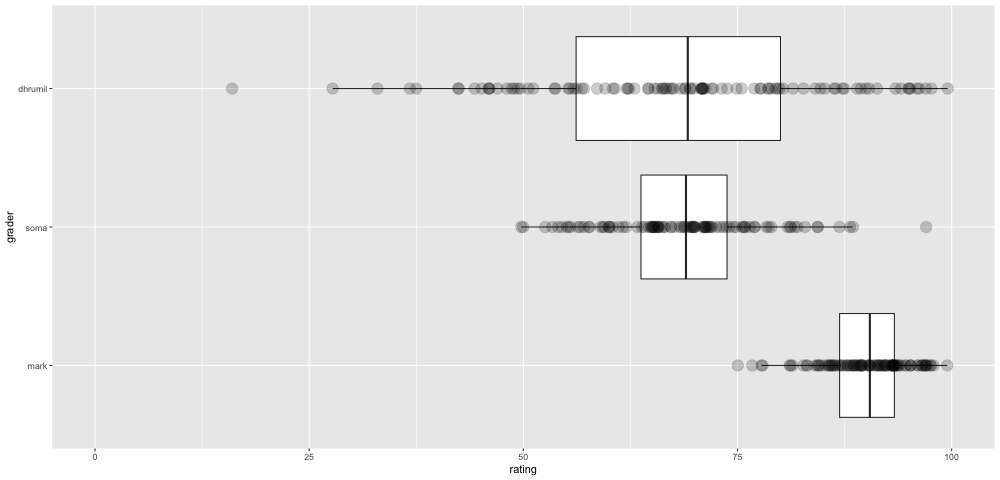

In [19]:
%%R -w 1000 -o fake_ratings

# put those into a long dataframe with user and rating
fake_ratings <- data.frame(mark, soma, dhrumil) %>% 
    pivot_longer(cols = everything(), names_to = "grader", values_to = "rating") %>% 
    mutate(grader = factor(grader, levels = c('mark', 'soma', 'dhrumil')))

ggplot(fake_ratings) +
    aes(rating, grader) + 
    geom_boxplot(
        outlier.shape = NA, 
    ) +
    geom_point(size=5, alpha=0.2) + 
    xlim(0, 100)


In [20]:
%%R 

fake_ratings %>% 
    group_by(grader) %>% 
    summarise(
        mean = mean(rating),
        median = median(rating),
        sd = sd(rating),
        min = min(rating),
        max = max(rating)
    )

# A tibble: 3 × 6
  grader   mean median    sd   min   max
  <fct>   <dbl>  <dbl> <dbl> <dbl> <dbl>
1 mark     90.1   90.4  5.04  75.0  99.5
2 soma     68.7   69.0  9.08  49.8  97.0
3 dhrumil  68.3   69.2 17.5   16.0  99.5


## Standardize

In [21]:
%%R -o fake_ratings_standardized

fake_ratings_standardized <- data.frame(mark, soma, dhrumil) %>% 
    mutate(mark = (mark - mean(mark)) / sd(mark),                                   # same as scale(mark)
           soma = (soma - mean(soma)) / sd(soma),                                   # same as scale(soma)
           dhrumil = (dhrumil - mean(dhrumil)) / sd(dhrumil))  %>%                  # same as scale(dhrumil)
    pivot_longer(cols = everything(), names_to = "grader", values_to = "rating") 


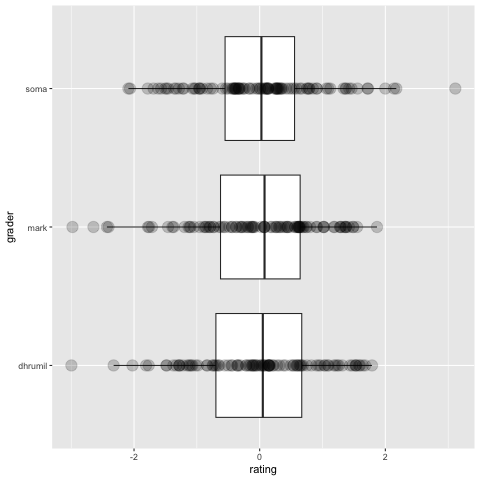

In [22]:
%%R 

ggplot(fake_ratings_standardized) +
    aes(rating, grader) + 
    geom_boxplot(
        outlier.shape = NA, 
    ) +
    geom_point(size=5, alpha=0.2) 

In [23]:
%%R 

fake_ratings_standardized %>% 
    group_by(grader) %>% 
    summarise(
        mean = mean(rating),
        median = median(rating),
        sd = sd(rating),
        min = min(rating),
        max = max(rating)
    )

# A tibble: 3 × 6
  grader       mean median    sd   min   max
  <chr>       <dbl>  <dbl> <dbl> <dbl> <dbl>
1 dhrumil  7.99e-16 0.0498     1 -3.00  1.79
2 mark    -3.77e-16 0.0772     1 -2.98  1.87
3 soma     1.87e-16 0.0274     1 -2.09  3.11


## Conduct Hypothesis Tests

In [24]:
%%R 

t.test(soma, dhrumil)


	Welch Two Sample t-test

data:  

soma and dhrumil
t = 0.20829, df = 148.94, p-value = 0.8353
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.478793  4.298582
sample estimates:
mean of x mean of y 
 68.73388  68.32398 



In [25]:
%%R 

t.test(soma, mark)


	Welch Two Sample t-test

data:  soma and mark
t = -20.527, df = 154.72, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -23.37796 -19.27350
sample estimates:
mean of x mean of y 
 68.73388  90.05961 



In [26]:
%%R 

t.test(mark, dhrumil)


	Welch Two Sample t-test

data:  mark and dhrumil
t = 11.961, df = 115.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is 

not equal to 0
95 percent confidence interval:
 18.13636 25.33489
sample estimates:
mean of x mean of y 
 90.05961  68.32398 

